In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
model = SVC(kernel='linear', C=1.0, random_state=42)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [8]:
y_pred = model.predict(x_test)

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
auc = accuracy_score(y_test, y_pred)
print("Accuracy: ", auc)
print(confusion_matrix(y_test, y_pred))

Accuracy:  1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



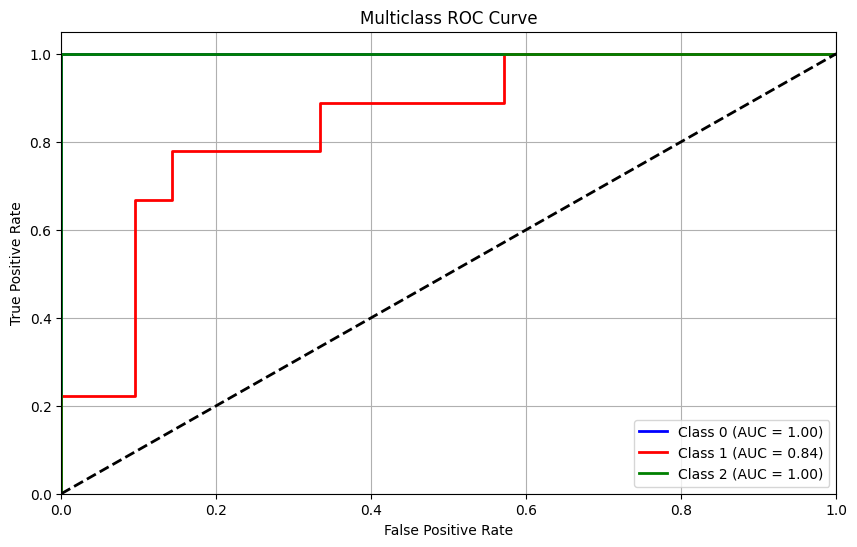

In [13]:
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Classification report
print(classification_report(y_test, y_pred))

# Binarize the output for multiclass
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get decision function scores for multiclass
# We need to use OneVsRestClassifier to get proper decision scores for each class
ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
ovr.fit(x_train, y_train)
y_scores = ovr.decision_function(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']  # Iris has 3 classes
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
